# Plot up 2D (surface) oil thickness for the Strait of Georgia Point
## Comparing high tide and low tide results for:
  - Alaska North Slope Crude (AKNS)
  - Diesel
  - Gasoline
  - Jet Fuel

In [3]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
import numpy as np
import xarray as xr
from salishsea_tools import viz_tools, utilities
import numpy.ma as ma
import datetime
%matplotlib inline

## Load results

In [4]:
mask = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02').tmaskutil.isel(time = 0).values[1:897:,1:397]

### high tide

In [55]:
AKNS = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/high_tide/Lagrangian_AKNS_crude_SOG_01dec17_MediumFloater_1000m3_6days_hi.nc')
diesel = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/high_tide/Lagrangian_DieselFuel_refined_SOG_01dec17_LightEvaporatorsDiesel_1000m3_6days_hi.nc')
gas = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/high_tide/Lagrangian_Gasoline_refined_SOG_01dec17_LightEvaporatorGas_1000m3_6days_hi.nc')
jet = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/high_tide/Lagrangian_JetFuel_refined_SOG_01dec17_LightEvaporatorJetFuel_1000m3_6days_hi.nc')

### low tide

In [56]:
AKNS_low = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/low_tide/Lagrangian_AKNS_crude_SOG_01dec17_MediumFloater_1000m3_6days_VVLfix.nc')
diesel_low = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/low_tide/Lagrangian_DieselFuel_refined_SOG_01dec17_LightEvaporatorsDiesel_1000m3_6days.nc')
gas_low = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/low_tide/Lagrangian_Gasoline_refined_SOG_01dec17_LightEvaporatorGas_1000m3_6days.nc')
jet_low = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/low_tide/Lagrangian_JetFuel_refined_SOG_01dec17_LightEvaporatorJetFuel_1000m3_6days.nc')

## Extract surface thickness and sum over time to get sense of where oil goes through simulation

### high tide

In [57]:
AKNS_thick = AKNS.Thickness_2D
diesel_thick = diesel.Thickness_2D
gas_thick = gas.Thickness_2D
jet_thick = jet.Thickness_2D

In [58]:
AKNS_thick_s = AKNS_thick.sum(dim='time')
diesel_thick_s = diesel_thick.sum(dim='time')
gas_thick_s = gas_thick.sum(dim='time')
jet_thick_s = jet_thick.sum(dim='time')

### low tide

In [59]:
AKNS_thick_low = AKNS_low.Thickness_2D
diesel_thick_low = diesel_low.Thickness_2D
gas_thick_low = gas_low.Thickness_2D
jet_thick_low = jet_low.Thickness_2D

In [60]:
AKNS_thick_low_s = AKNS_thick_low.sum(dim='time')
diesel_thick_low_s = diesel_thick_low.sum(dim='time')
gas_thick_low_s = gas_thick_low.sum(dim='time')
jet_thick_low_s = jet_thick_low.sum(dim='time')

## Plot results

Text(0.5, 1.0, 'gasoline')

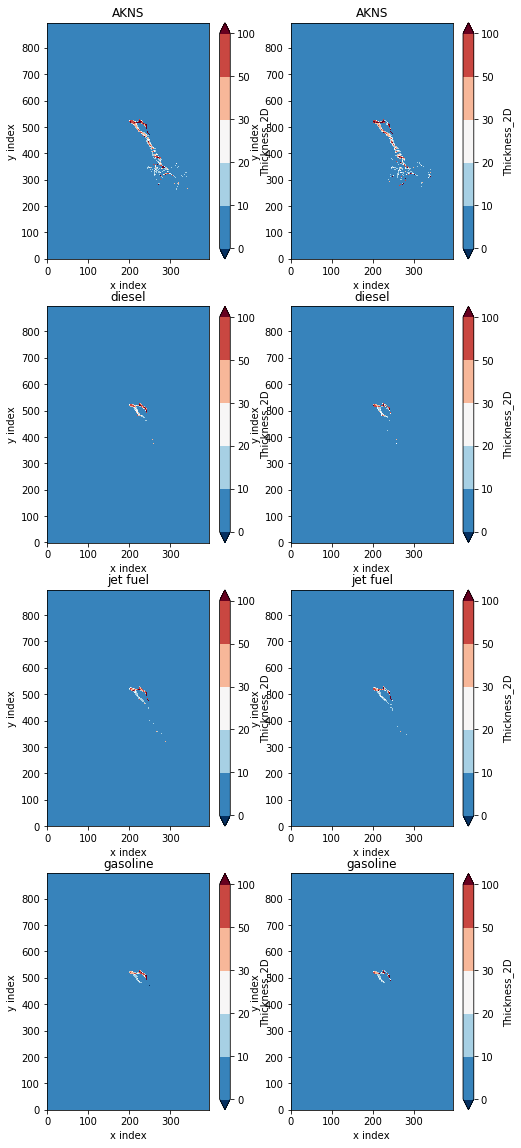

In [83]:
fig = plt.figure(figsize=(8,20))

# high tide
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(423)
ax3 = fig.add_subplot(425)
ax4 = fig.add_subplot(427)
AKNS_thick_s.plot(ax=ax1, levels = [0, 10, 20, 30, 50,100])
diesel_thick_s.plot(ax=ax2, levels = [0, 10, 20, 30, 50,100])
jet_thick_s.plot(ax=ax3, levels = [0, 10, 20, 30, 50,100])
gas_thick_s.plot(ax=ax4, levels = [0, 10, 20, 30, 50,100])

# low tide
ax5 = fig.add_subplot(422)
ax6 = fig.add_subplot(424)
ax7 = fig.add_subplot(426)
ax8 = fig.add_subplot(428)
AKNS_thick_s.plot(ax=ax5, levels = [0, 10, 20, 30, 50,100])
diesel_thick_s.plot(ax=ax6, levels = [0, 10, 20, 30, 50,100])
jet_thick_s.plot(ax=ax7, levels = [0, 10, 20, 30, 50,100])
gas_thick_s.plot(ax=ax8, levels = [0, 10, 20, 30, 50,100])

# titles
ax1.set_title('AKNS')
ax2.set_title('diesel')
ax3.set_title('jet fuel')
ax4.set_title('gasoline')

# titles
ax5.set_title('AKNS')
ax6.set_title('diesel')
ax7.set_title('jet fuel')
ax8.set_title('gasoline')
